In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv("Heart Disease data.csv")

In [4]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
dataset=dataset.drop_duplicates()

In [7]:
dataset.shape

(302, 14)

In [8]:
dataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [9]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
target=dataset.groupby('target').size()

In [12]:
target

target
0    138
1    164
dtype: int64

In [13]:
dataset=dataset.drop_duplicates()

In [14]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [15]:
dataset.shape

(302, 14)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])


In [18]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,2,-0.661712,-0.687083,0,0,-1.511859,0,0.394086,1,0,2,1
733,-1.153610,0,2,-1.346085,-2.041893,0,1,1.112172,0,-0.382092,1,0,2,1
739,-0.267966,1,0,-0.205463,0.164513,0,1,0.499898,1,-0.899544,2,1,3,0
843,0.506972,1,3,1.619532,0.512893,0,0,-1.074521,0,-0.899544,2,0,2,0


In [19]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [20]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,3.020000e+02,302.000000,302.000000,3.020000e+02,3.020000e+02,302.000000,302.000000,3.020000e+02,302.000000,3.020000e+02,302.000000,302.000000,302.000000,302.000000
mean,-2.676299e-16,0.682119,0.963576,-6.676043e-16,-1.470494e-17,0.149007,0.526490,-5.323189e-16,0.327815,-1.294035e-16,1.397351,0.718543,2.314570,0.543046
std,1.001660e+00,0.466426,1.032044,1.001660e+00,1.001660e+00,0.356686,0.526027,1.001660e+00,0.470196,1.001660e+00,0.616274,1.006748,0.613026,0.498970
min,-2.814192e+00,0.000000,0.000000,-2.144521e+00,-2.332210e+00,0.000000,0.000000,-3.436149e+00,0.000000,-8.995441e-01,0.000000,0.000000,0.000000,0.000000
25%,-7.107878e-01,0.000000,0.000000,-6.617119e-01,-6.870826e-01,0.000000,0.000000,-7.137164e-01,0.000000,-8.995441e-01,1.000000,0.000000,2.000000,0.000000
50%,1.195033e-01,1.000000,1.000000,-9.140084e-02,-1.161266e-01,0.000000,1.000000,1.281605e-01,0.000000,-2.096081e-01,1.000000,0.000000,2.000000,1.000000
75%,7.283833e-01,1.000000,2.000000,4.789102e-01,5.467629e-01,0.000000,1.000000,7.185677e-01,1.000000,4.803280e-01,2.000000,1.000000,3.000000,1.000000
max,2.499671e+00,1.000000,3.000000,3.900776e+00,6.145034e+00,1.000000,2.000000,2.292987e+00,1.000000,4.447460e+00,2.000000,4.000000,3.000000,1.000000


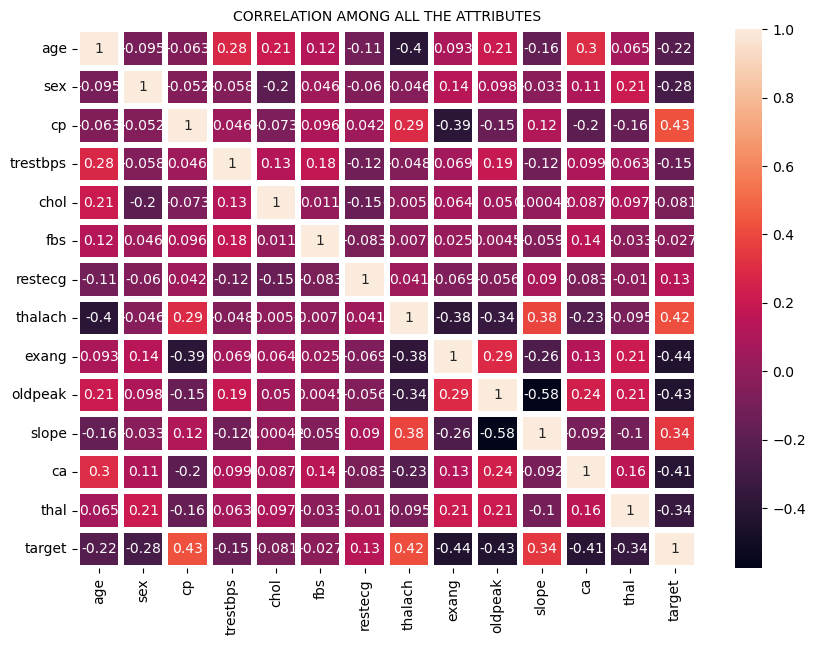

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(),annot=True,linewidth=3)
plt.title ('CORRELATION AMONG ALL THE ATTRIBUTES',fontsize=10)
plt.show()

In [22]:
dataset['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

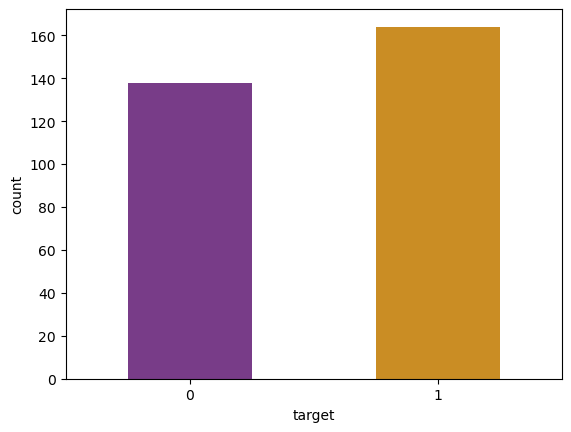

In [23]:
sns.countplot(x='target',data=dataset,palette='CMRmap',width=0.5)
plt.show()

In [24]:
dataset['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

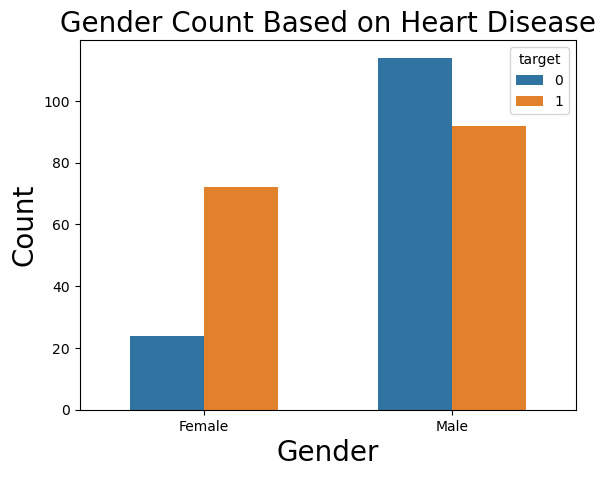

In [25]:


sns.countplot(x='sex', hue='target', data=dataset, width=0.6)
plt.xlabel('Gender', fontsize=20) 
plt.ylabel('Count', fontsize=20)  
plt.title('Gender Count Based on Heart Disease', fontsize=20)
plt.xticks([0, 1],['Female', 'Male'])  
plt.show()           

# we can see that males are more prone to Heart Disease

C:\Users\USER 10\AppData\Local\Temp\ipykernel_13748\2985088185.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'],bins=20)


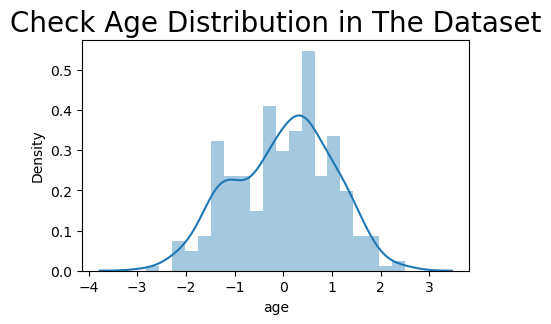

In [26]:
plt.figure(figsize=(5,3))
plt.title('Check Age Distribution in The Dataset', fontsize=20)
sns.distplot(dataset['age'],bins=20)
plt.show()

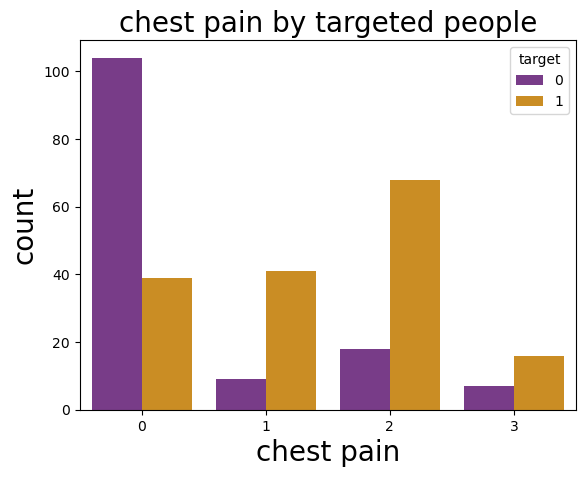

In [27]:
sns.countplot(data=dataset,x='cp', hue='target',palette='CMRmap')
plt.xlabel('chest pain', fontsize=20) 
plt.ylabel('count', fontsize=20)  
plt.title('chest pain by targeted people', fontsize=20)
plt.show()


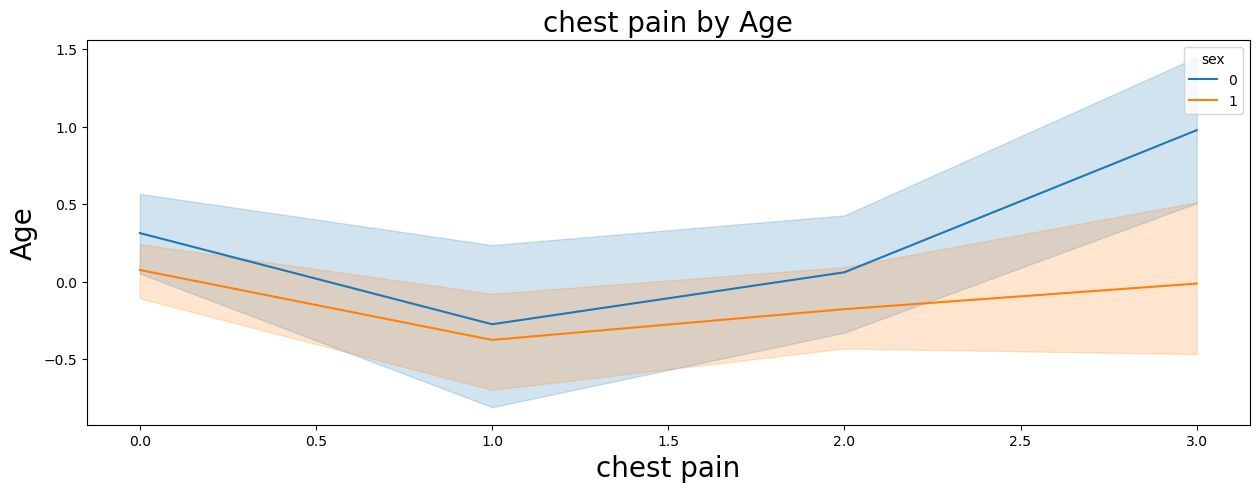

In [28]:
plt.figure(figsize=(15,5))
sns.lineplot(x='cp',data=dataset,y='age' ,hue='sex')
plt.xlabel('chest pain', fontsize=20) 
plt.ylabel('Age', fontsize=20)  
plt.title('chest pain by Age', fontsize=20)
plt.show()

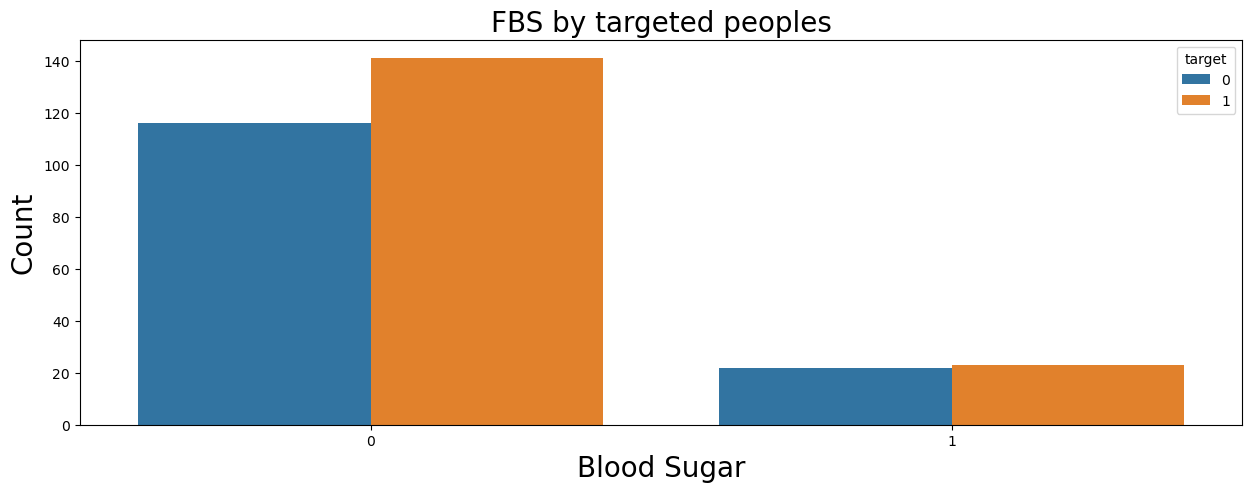

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(x='fbs',data=dataset ,hue='target')
plt.xlabel('Blood Sugar', fontsize=20) 
plt.ylabel('Count', fontsize=20)  
plt.title('FBS by targeted peoples', fontsize=20)
plt.show()

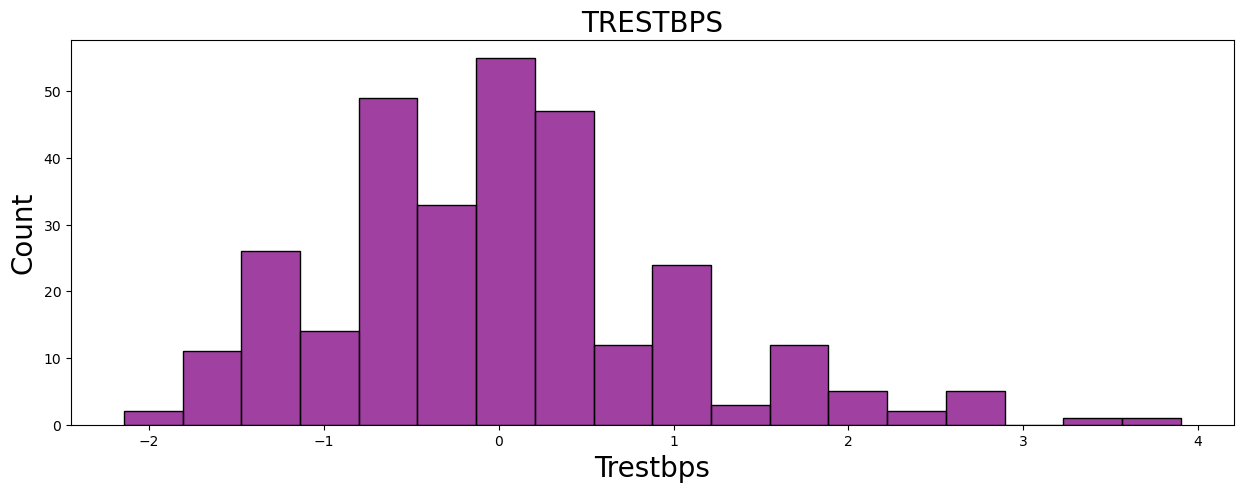

In [30]:
plt.figure(figsize=(15,5))
sns.histplot(x='trestbps',data=dataset ,color='PURPLE')
plt.xlabel('Trestbps', fontsize=20) 
plt.ylabel('Count', fontsize=20)  
plt.title('TRESTBPS', fontsize=20)
plt.show()

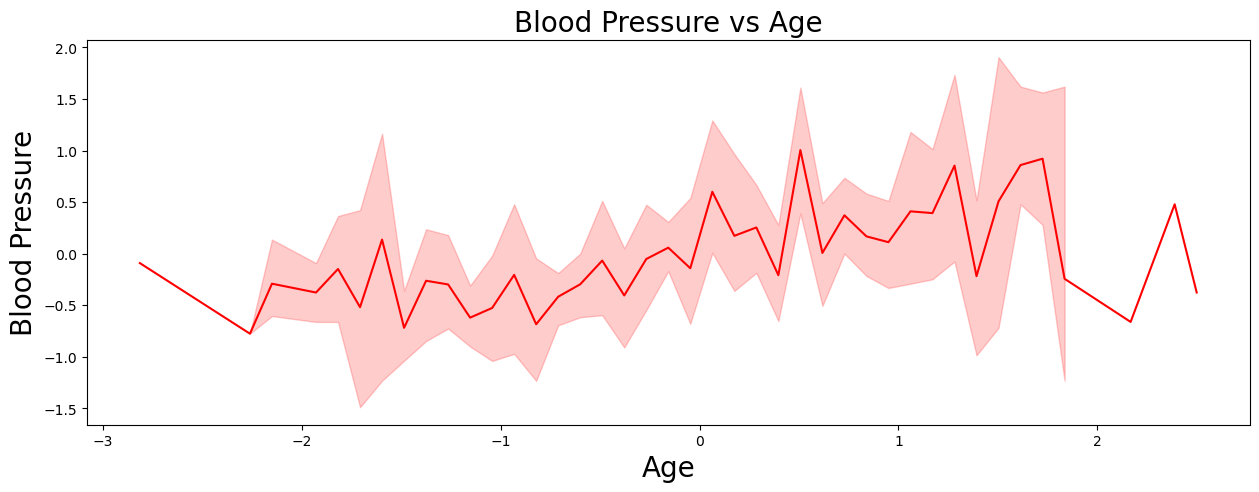

In [31]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='age', y='trestbps', data=dataset, color='red') 
plt.xlabel('Age', fontsize=20)
plt.ylabel('Blood Pressure', fontsize=20)
plt.title('Blood Pressure vs Age', fontsize=20)
plt.show()

#Here we can observe thet Blood pressure increases between age of 50 to 60 and somehow continue the pattern till 70.

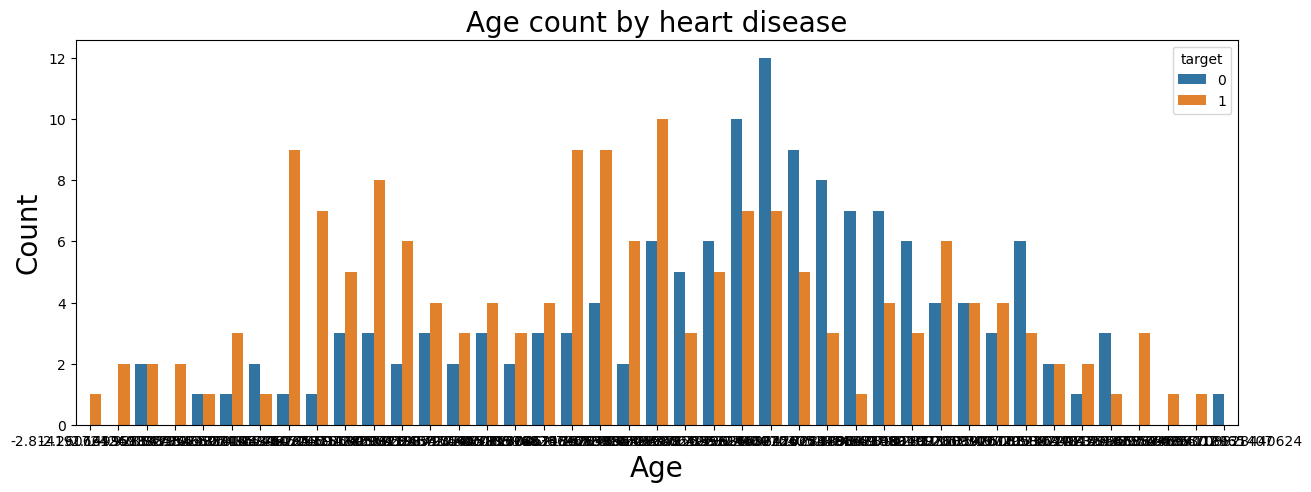

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(x='age',data=dataset ,hue='target')
plt.xlabel('Age', fontsize=20) 
plt.ylabel('Count', fontsize=20)  
plt.title('Age count by heart disease', fontsize=20)
plt.show()

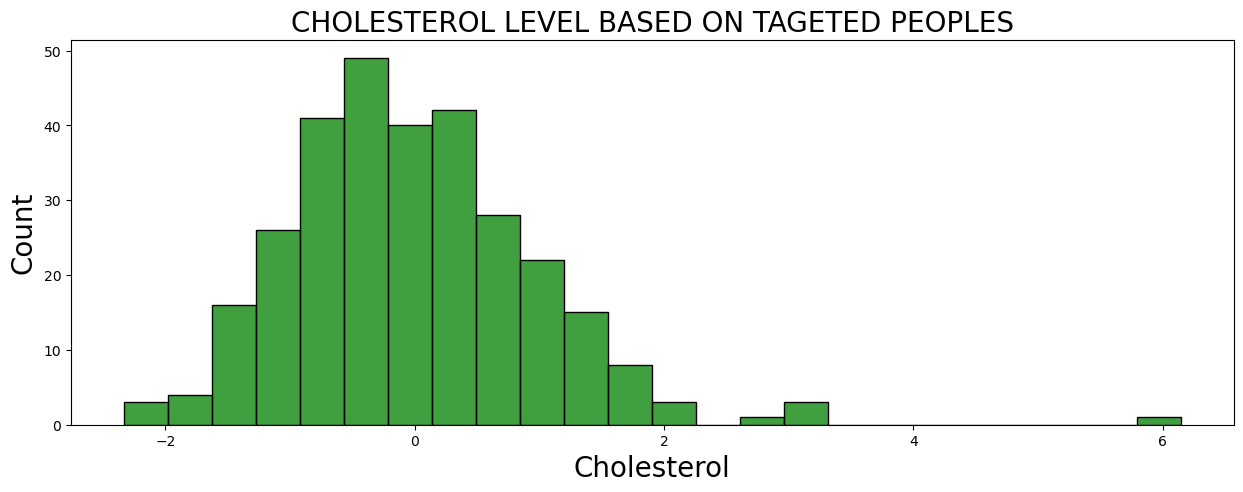

In [33]:
plt.figure(figsize=(15,5))
sns.histplot(x='chol',data=dataset ,color='green')
plt.xlabel('Cholesterol', fontsize=20) 
plt.ylabel('Count', fontsize=20)  
plt.title('CHOLESTEROL LEVEL BASED ON TAGETED PEOPLES', fontsize=20)
plt.show()

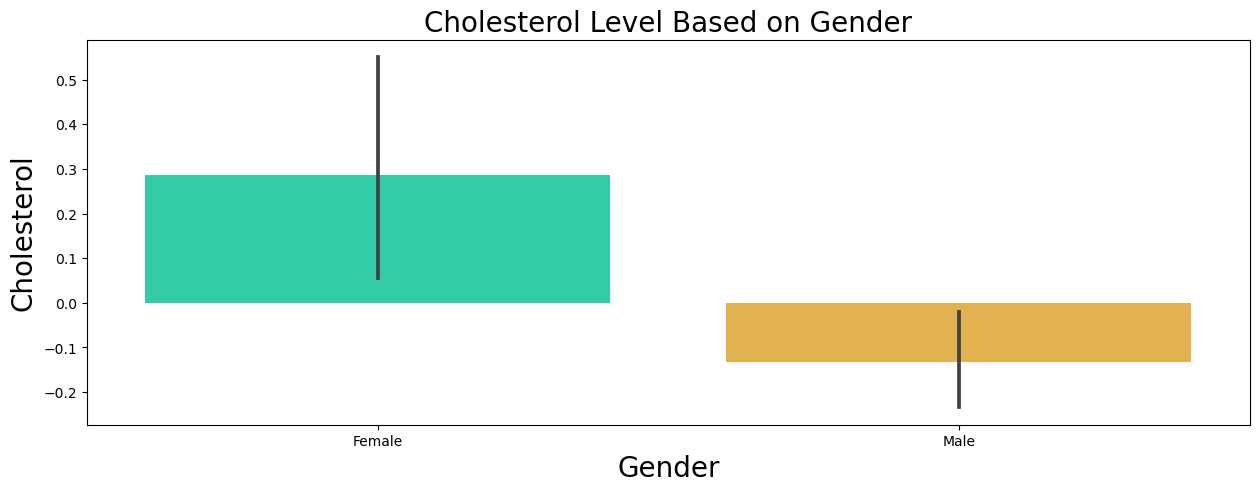

In [34]:
plt.figure(figsize=(15, 5))
sns.barplot(x='sex', y='chol', data=dataset, palette='turbo')  
plt.xlabel('Gender', fontsize=20)  
plt.ylabel('Cholesterol', fontsize=20)
plt.title('Cholesterol Level Based on Gender', fontsize=20)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()


# females have little bit of higher cholesterol than males

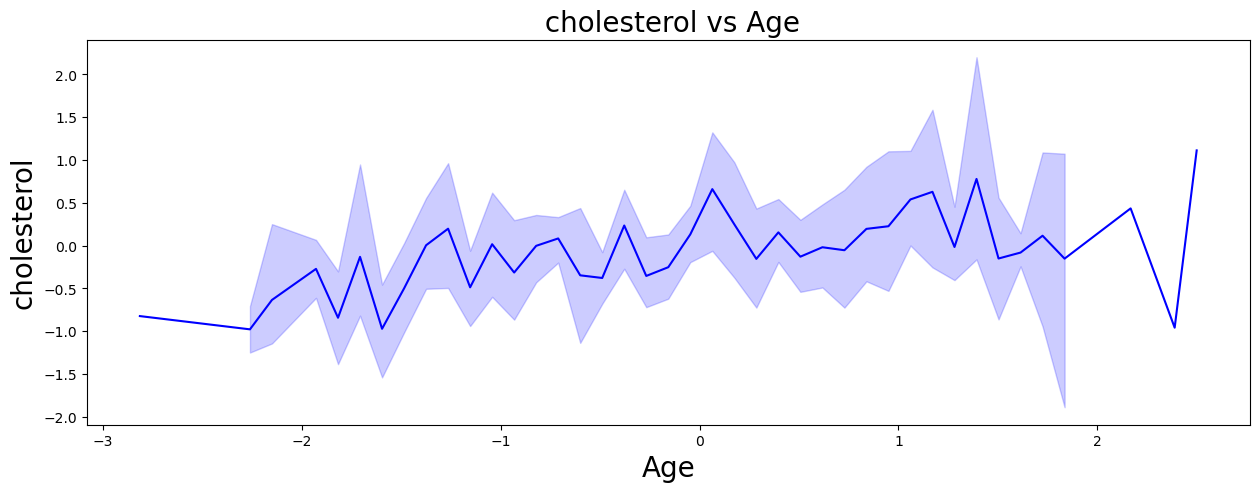

In [35]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='age', y='chol', data=dataset, color='blue') 
plt.xlabel('Age', fontsize=20)
plt.ylabel('cholesterol', fontsize=20)
plt.title(' cholesterol vs Age', fontsize=20)
plt.show()

#simllarly cholesterol increasing in the age group of 50 -60

In [36]:
dataset.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [37]:
categrical_val=[]
continues_val=[]
for columns in dataset.columns:
    if dataset[columns].nunique() <=10:
        categrical_val.append(columns)
    else:
        continues_val.append(columns)
    

In [38]:
categrical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [39]:
continues_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# PREDICTION USING MACHINE LEARNING:

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
dataset = pd.read_csv("Heart Disease data.csv")


In [42]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [43]:
print(dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [44]:
dataset.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [45]:
independent=dataset[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

In [46]:
independent

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [47]:
dependent=dataset[['target']]

In [48]:
dependent

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [49]:
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2, random_state=42)


In [50]:
#RandomForestClassifier:

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

C:\Users\USER 10\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=1000, random_state=42)

In [52]:
y_pred1= model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred1)

0.9853658536585366

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1)

In [55]:
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_pred1)

In [56]:
print(clf_report)
print(cm)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

[[102   0]
 [  3 100]]


In [57]:
#Support Vector Machine:

In [58]:
from sklearn.svm import SVC
model = SVC(kernel='poly', random_state=42)
model.fit(X_train, y_train)

C:\Users\USER 10\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly', random_state=42)

In [59]:
y_pred2= model.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred2)

0.6682926829268293

In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred2)

In [62]:
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_pred2)

In [63]:
print(clf_report)
print(cm)

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       102
           1       0.66      0.69      0.68       103

    accuracy                           0.67       205
   macro avg       0.67      0.67      0.67       205
weighted avg       0.67      0.67      0.67       205

[[66 36]
 [32 71]]


In [64]:
# LogisticRegression:

In [65]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

C:\Users\USER 10\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER 10\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_pred3= model.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred3)

0.7853658536585366

In [68]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred3)

In [69]:
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_pred3)

In [70]:
print(clf_report)
print(cm)

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205

[[71 31]
 [13 90]]


In [71]:
#KNeighborsClassifier:

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
knn.fit(X_train,y_train)

C:\Users\USER 10\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [73]:
y_pred4= knn.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred4)

0.6780487804878049

In [75]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred4)

In [76]:
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_pred4)

In [77]:
print(clf_report)
print(cm)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       102
           1       0.68      0.68      0.68       103

    accuracy                           0.68       205
   macro avg       0.68      0.68      0.68       205
weighted avg       0.68      0.68      0.68       205

[[69 33]
 [33 70]]


In [78]:
#DecisionTreeClassifier:

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
y_pred5= dt.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred5)

0.9853658536585366

In [83]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred4)

In [84]:
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_pred4)

In [85]:
print(clf_report)
print(cm)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       102
           1       0.68      0.68      0.68       103

    accuracy                           0.68       205
   macro avg       0.68      0.68      0.68       205
weighted avg       0.68      0.68      0.68       205

[[69 33]
 [33 70]]


In [86]:
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)
acc3 = accuracy_score(y_test, y_pred3)
acc4 = accuracy_score(y_test, y_pred4)
acc5 = accuracy_score(y_test, y_pred5)

In [87]:
final_data = pd.DataFrame({
    'Model': ['Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors', 'Decision Tree', 'LogisticRegression'],
    'Accuracy': [acc1, acc2, acc3, acc4, acc5]})

In [88]:
final_data

,Model,Accuracy
0,Random Forest,0.985366
1,Support Vector Machine,0.668293
2,K-Nearest Neighbors,0.785366
3,Decision Tree,0.678049
4,LogisticRegression,0.985366


In [89]:
import seaborn as sns

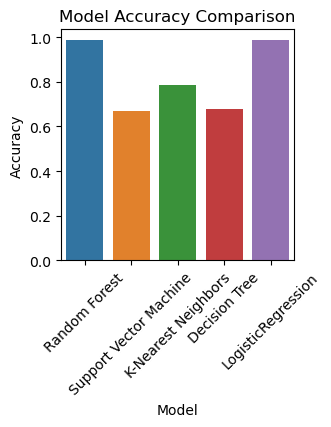

In [90]:

plt.figure(figsize=(3, 3))
sns.barplot(x='Model', y='Accuracy', data=final_data)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


In [91]:
from sklearn.ensemble import RandomForestClassifier


In [92]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(independent,dependent)

C:\Users\USER 10\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [93]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [94]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1)

In [95]:
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_pred1)

In [96]:
print(clf_report)
print(cm)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

[[102   0]
 [  3 100]]


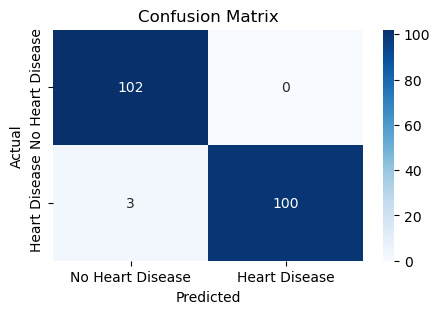

In [97]:
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# FINDINGS :

In [ ]:

True Negatives (TN):

There are 102 true negative instances, meaning the model correctly predicted 102 samples as class 0 (no heart disease).
False Positives (FP):

There are 0 false positive instances, meaning the model did not incorrectly predict any samples as class 1 when they actually belong to class 0. This indicates a perfect specificity for class 0.
False Negatives (FN):

There are 3 false negative instances, meaning the model incorrectly predicted 3 samples as class 0 when they actually belong to class 1 (heart disease). This means that 3 cases of heart disease were missed by the model.
True Positives (TP):

There are 100 true positive instances, meaning the model correctly predicted 100 samples as class 1.